In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, clear_output

In [108]:
dataset= pd.read_csv("stroke prediction.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [109]:
dataset.drop(columns=["id","Residence_type"],inplace=True)

In [110]:
dataset["gender"]=dataset["gender"].astype('category')
dataset["ever_married"]=dataset["ever_married"].astype('category')
# dataset["Residence_type"]=dataset["Residence_type"].astype('category')
dataset["work_type"]=dataset["work_type"].astype('category')
dataset["smoking_status"]=dataset.smoking_status.astype("category")

In [111]:
dataset_imputed=dataset.copy()

In [112]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

dataset_imputed.gender=encoder.fit_transform(dataset_imputed.gender)

dataset_imputed.ever_married=encoder.fit_transform(dataset_imputed.ever_married)

dataset_imputed.work_type=encoder.fit_transform(dataset_imputed.work_type)

# dataset_imputed.Residence_type=encoder.fit_transform(dataset_imputed.Residence_type)

dataset_imputed.smoking_status=dataset_imputed.smoking_status.map({'never smoked':0,'formerly smoked':1,'smokes':2})

In [113]:
dataset_imputed

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,95.12,18.0,NaN,0
1,1,58.0,1,0,1,2,87.96,39.2,0,0
2,0,8.0,0,0,0,2,110.89,17.6,NaN,0
3,0,70.0,0,0,1,2,69.04,35.9,1,0
4,1,14.0,0,0,0,1,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,4,58.64,20.4,0,0
43396,0,56.0,0,0,1,0,213.61,55.4,1,0
43397,0,82.0,1,0,1,2,91.94,28.9,1,0
43398,1,40.0,0,0,1,2,99.16,33.2,0,0


In [114]:
X=dataset_imputed.drop(columns="stroke")
y=dataset_imputed["stroke"]

In [115]:
from sklearn.model_selection import train_test_split

train,test= train_test_split(dataset_imputed,test_size=0.2,stratify=dataset_imputed.stroke)

## Undersampling

In [116]:
class_0 = train[train.stroke==0]
class_1 = train[train.stroke==1]

In [117]:
class_0_under = class_0.sample(len(class_1))
dataset_under = pd.concat([class_0_under,class_1],axis=0)
dataset_under

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
14211,0,68.0,0,0,1,2,198.90,38.5,0,0
2006,1,55.0,0,1,0,2,56.90,28.2,0,0
26396,0,65.0,1,0,1,2,63.54,22.7,1,0
36489,1,54.0,1,0,1,2,204.53,43.3,1,0
35660,0,43.0,0,0,1,2,65.73,25.7,0,0
...,...,...,...,...,...,...,...,...,...,...
20084,1,75.0,1,1,0,2,80.66,NaN,NaN,1
40513,1,79.0,0,0,1,3,87.06,24.3,1,1
35823,1,81.0,1,1,0,2,65.12,27.4,1,1
18898,0,70.0,0,0,1,2,213.91,38.6,NaN,1


In [118]:
X_train=dataset_under.drop(columns="stroke")
y_train=dataset_under["stroke"]

X_test=test.drop(columns="stroke")
y_test=test["stroke"]

In [119]:
from sklearn.impute import KNNImputer

imputer=KNNImputer()

X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

X_train["smoking_status"]= X_train.smoking_status.apply(round)
X_train

X_test["smoking_status"]= X_test.smoking_status.apply(round)
X_test

X_train["smoking_status"]=X_train["smoking_status"].astype("category")
X_test["smoking_status"]=X_test["smoking_status"].astype("category")

X_train["work_type"]=X_train["work_type"].astype("int").astype("category")
X_test["work_type"]=X_test["work_type"].astype("int").astype("category")

X_train[["gender","hypertension","heart_disease","ever_married"]]=X_train[["gender","hypertension","heart_disease","ever_married"]].astype("int")

X_test[["gender","hypertension","heart_disease","ever_married"]]=X_test[["gender","hypertension","heart_disease","ever_married"]].astype("int")

In [120]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,0,68.0,0,0,1,2,198.90,38.50,0
1,1,55.0,0,1,0,2,56.90,28.20,0
2,0,65.0,1,0,1,2,63.54,22.70,1
3,1,54.0,1,0,1,2,204.53,43.30,1
4,0,43.0,0,0,1,2,65.73,25.70,0
...,...,...,...,...,...,...,...,...,...
1247,1,75.0,1,1,0,2,80.66,30.36,0
1248,1,79.0,0,0,1,3,87.06,24.30,1
1249,1,81.0,1,1,0,2,65.12,27.40,1
1250,0,70.0,0,0,1,2,213.91,38.60,1


In [121]:
X_train=pd.get_dummies(X_train).drop(columns=["work_type_0","smoking_status_0"])
X_train

X_test=pd.get_dummies(X_test).drop(columns=["work_type_0","smoking_status_0"])
X_test

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2
0,0,40.0,0,0,0,158.93,31.3,0,1,0,0,0,1
1,1,10.0,0,0,0,72.55,18.7,0,0,0,1,1,0
2,0,41.0,0,0,1,79.89,26.2,0,0,0,0,0,0
3,0,60.0,0,0,1,89.98,24.1,0,1,0,0,0,0
4,0,55.0,0,0,1,108.63,34.4,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,1,55.0,0,1,1,80.08,26.9,0,1,0,0,0,1
8676,1,65.0,0,0,1,108.27,29.8,0,1,0,0,1,0
8677,0,43.0,0,0,1,97.57,41.0,0,1,0,0,0,0
8678,0,43.0,0,0,0,113.27,45.6,0,1,0,0,0,0


In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [123]:
X_train

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2
0,0.0,0.828767,0.0,0.0,1.0,0.663805,0.529175,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.669765,0.0,1.0,0.0,0.008400,0.321932,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.792074,1.0,0.0,1.0,0.039047,0.211268,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.657534,1.0,0.0,1.0,0.689790,0.625755,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.522994,0.0,0.0,1.0,0.049155,0.271630,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,1.0,0.914384,1.0,1.0,0.0,0.118065,0.365392,0.0,1.0,0.0,0.0,0.0,0.0
1248,1.0,0.963307,0.0,0.0,1.0,0.147605,0.243461,0.0,0.0,1.0,0.0,1.0,0.0
1249,1.0,0.987769,1.0,1.0,0.0,0.046340,0.305835,0.0,1.0,0.0,0.0,1.0,0.0
1250,0.0,0.853229,0.0,0.0,1.0,0.733084,0.531187,0.0,1.0,0.0,0.0,1.0,0.0


In [124]:
y_train

14211    0
2006     0
26396    0
36489    0
35660    0
        ..
20084    1
40513    1
35823    1
18898    1
21080    1
Name: stroke, Length: 1252, dtype: int64

In [125]:
print(X_train.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'work_type_1', 'work_type_2', 'work_type_3',
       'work_type_4', 'smoking_status_1', 'smoking_status_2'],
      dtype='object')


### Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logistic = LogisticRegression()

logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
y_train_pred=logistic.predict(X_train)
y_test_pred= logistic.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.7981438515081207, 0.09812188577999234)

### KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

def val_score(n_neighbors):
    
    avg=[]
    std=[]
    
    
    for i in n_neighbors:
        score = cross_val_score(KNN(n_neighbors=i),scoring='f1',X=X_train, y=y_train, cv=10)
        
        avg.append(score.mean())
        std.append(score.std())
        
    return avg,std

In [130]:
mean,std= val_score(range(1,50))

In [131]:
df=pd.DataFrame({"i":range(1,50),"mean":mean,"std":std})

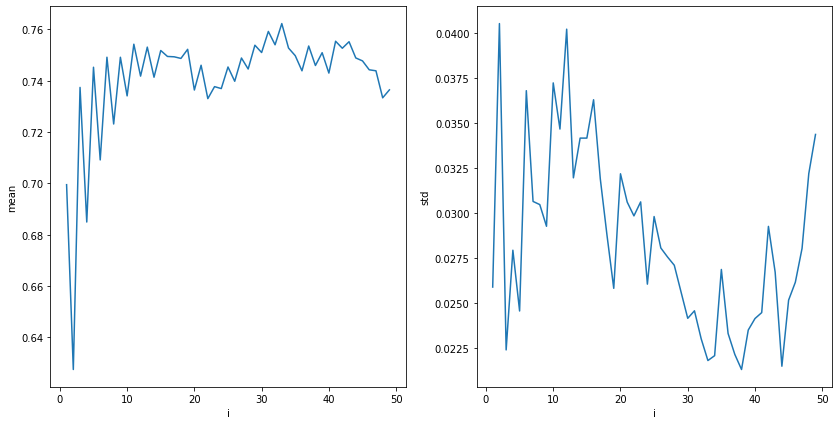

In [132]:
fig,ax=plt.subplots(1,2,figsize=(14,7))


sns.lineplot(data=df,y="mean",x="i",ax=ax[0])
sns.lineplot(data=df,y="std",x="i",ax=ax[1])

In [136]:
knn=KNN(n_neighbors=38)

knn.fit(X_train,y_train)

y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.7751572327044026, 0.08782287822878229)

### Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=30)

tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(1.0, 0.07786741494212555)

In [138]:
tree.get_depth()

21

In [139]:
tree.get_n_leaves()

262

### Changing CCP_APLHAS

In [140]:
path=tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

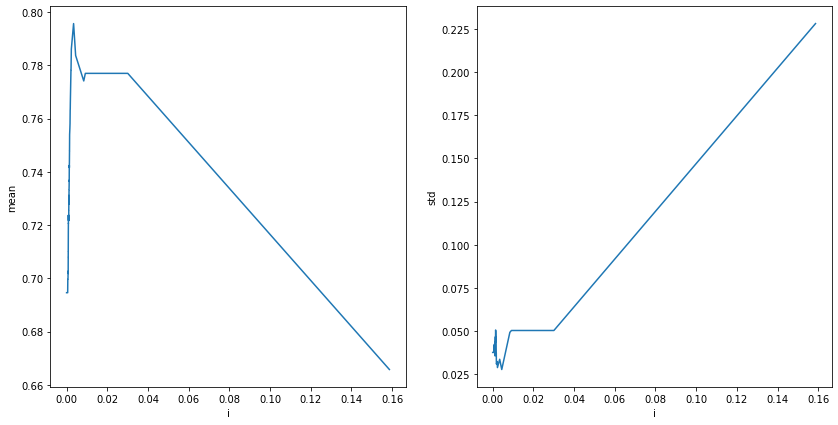

In [141]:
def val_score(alphas):
    
    avg=[]
    std=[]
    
    
    for i in alphas:
        score = cross_val_score(DecisionTreeClassifier(ccp_alpha=i,random_state=40),scoring='f1',X=X_train, y=y_train, cv=10)
        
        avg.append(score.mean())
        std.append(score.std())
        
    return avg,std

mean,std= val_score(ccp_alphas)
df=pd.DataFrame({"i":ccp_alphas,"mean":mean,"std":std})

fig,ax=plt.subplots(1,2,figsize=(14,7))
sns.lineplot(data=df,y="mean",x="i",ax=ax[0])
sns.lineplot(data=df,y="std",x="i",ax=ax[1])

In [145]:
df[df["mean"]==df["mean"].max()]

,i,mean,std
86,0.003439,0.795655,0.033715


In [146]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=30,ccp_alpha=0.003439)

tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.8022151898734178, 0.09553158705701079)

In [147]:
tree.get_depth()

4

### K-Fold Cross Validation across Max_depth

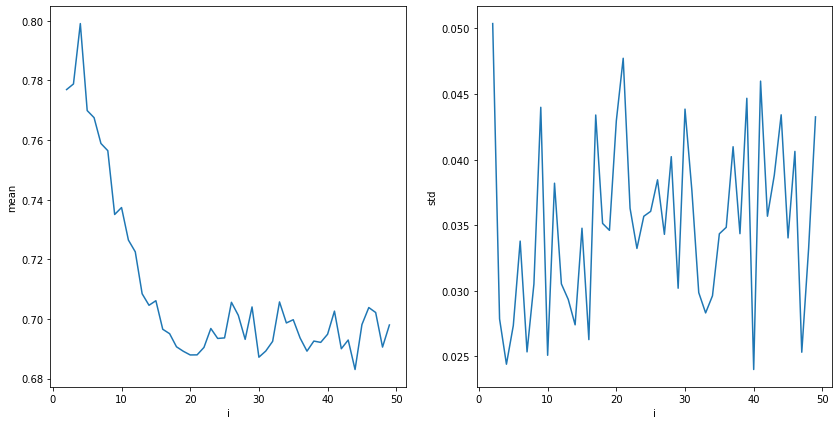

In [148]:
def val_score(depth):
    
    avg=[]
    std=[]
    
    
    for i in depth:
        score = cross_val_score(DecisionTreeClassifier(max_depth=i),scoring='f1',X=X_train, y=y_train, cv=10)
        
        avg.append(score.mean())
        std.append(score.std())
        
    return avg,std

mean,std= val_score(range(2,50))
df=pd.DataFrame({"i":range(2,50),"mean":mean,"std":std})

fig,ax=plt.subplots(1,2,figsize=(14,7))
sns.lineplot(data=df,y="mean",x="i",ax=ax[0])
sns.lineplot(data=df,y="std",x="i",ax=ax[1])

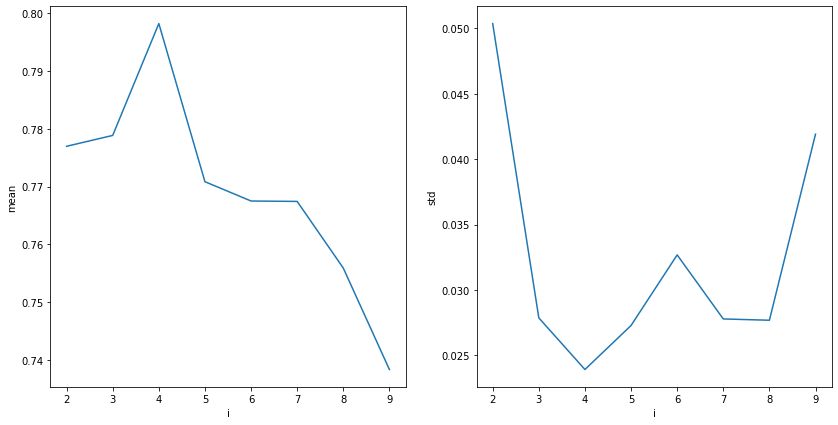

In [149]:
mean,std= val_score(range(2,10))
df=pd.DataFrame({"i":range(2,10),"mean":mean,"std":std})

fig,ax=plt.subplots(1,2,figsize=(14,7))
sns.lineplot(data=df,y="mean",x="i",ax=ax[0])
sns.lineplot(data=df,y="std",x="i",ax=ax[1])

In [150]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=5,random_state=30)

tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.8186195826645265, 0.09914668833807395)